# Python 機器學習從零至一 

> 類別預測的任務

[數據交點](https://www.datainpoint.com/) | 郭耀仁 <yaojenkuo@datainpoint.com>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from pyvizml import LogitReg

## 關於類別預測的任務

## 類別預測的任務：分類器

- 「類別預測」是「監督式學習」的其中一種應用類型。
- 預測的目標向量 $y$ 屬於離散型的類別變數。
- 更常被稱為「分類器」。

## 預測 NBA 球員的鋒衛位置

- 資料（Experience）：一定數量的球員資料。
- 任務（Task）：利用模型預測球員的是前鋒或後衛。
- 評估（Performance）：模型預測的鋒衛位置與球員實際鋒衛位置的誤分類數。
- 但書（Condition）：隨著資料觀測值筆數增加，預測誤分類數應該要減少。

In [2]:
# players_stats 資料中的 pos
csv_url = "https://raw.githubusercontent.com/yaojenkuo/ml-newbies/master/player_stats.csv"
player_stats = pd.read_csv(csv_url)
y = player_stats["pos"].values
y.dtype

dtype('O')

## `player_stats` 資料中的 `pos` 有 7 個不同的類別

In [3]:
print(player_stats["pos"].unique())
print(player_stats["pos"].nunique())

['F' 'C' 'C-F' 'G' 'F-G' 'G-F' 'F-C']
7


## 先將多元分類問題簡化為二元分類問題

- 鋒衛位置分作後衛（G）與前鋒（F）。
- 分別對應整數 0 與整數 1。

In [4]:
pos_binary = player_stats["pos"].map(lambda x: 0 if x[0] == "G" else 1)
y = pos_binary.values
np.unique(y)

array([0, 1])

## 該如何預測 NBA 球員的鋒衛位置

- 隨意猜測的黑猩猩模型。
- 基於規則（Rule-based）的專家模型。
- 基於最小化損失函數的機器學習模型。
- ...等。

## 隨意猜測的黑猩猩模型

像投擲硬幣一般決定整數 0 （後衛）或整數 1（前鋒）。

In [5]:
y_train, y_valid = train_test_split(y, test_size=0.33, random_state=42)
y_hat = np.random.randint(0, 2, size=y_valid.size)

## 評估隨意猜測的黑猩猩模型：誤分類數

\begin{equation}
\sum_{i}^{m} \mid y^{(train)}_i \neq \hat{y_i}^{(train)} \mid
\end{equation}

In [6]:
errors_chimp = np.sum(y_valid != y_hat)
errors_chimp

96

## 基於規則的專家模型

根據 NBA 球員的場均助攻數決定。

In [7]:
mean_apg = player_stats["apg"].mean()
mean_apg_train_y_hat = player_stats["apg"].map(lambda x: 0 if x > mean_apg else 1).values
mean_apg_train, y_hat = train_test_split(mean_apg_train_y_hat, test_size=0.33, random_state=42)

## 評估基於規則的專家模型：誤分類數

\begin{equation}
\sum_{i}^{m} \mid y^{(train)}_i \neq \hat{y_i}^{(train)} \mid
\end{equation}

In [8]:
errors_expert = np.sum(y_valid != y_hat)
errors_expert

58

## 基於最小化損失函數的機器學習模型

將 `apg` 與 `rpg` 當作特徵矩陣 $X$ 作為鋒衛位置的預測依據。

\begin{equation}
\operatorname*{arg\,min}_w \; \frac{1}{m}(-ylog(\sigma(Xw)) - (1-y)log(1-\sigma(Xw))) \\
\text{where} \; \sigma(x) = \frac{1}{1 + e^{-x}}
\end{equation}

In [9]:
X = player_stats[["apg", "rpg"]].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
h = LogisticRegression(C=1e6)
h.fit(X_train, y_train)
y_hat = h.predict(X_valid)

## 指定參數 `C=1e6` 的用意

- 參數 `C` 用來描述預測器的正規化（Regularization）程度。
- 當 `C` 愈大表示正規化效果愈低，反之 `C` 愈小表示正規化效果愈高。
- `LogisticRegression` 類別預設 `C=1` 這是具有正規化效果的參數設定。
- 為了比較自訂演算方法的結果，得先將正規化效果降到很低。

## 評估基於最小化損失函數的機器學習模型：誤分類數

\begin{equation}
\sum_{i}^{m} \mid y^{(train)}_i \neq \hat{y_i}^{(train)} \mid
\end{equation}

In [10]:
errors_ml = np.sum(y_valid != y_hat)
errors_ml

28

## 該如何預測 NBA 球員的鋒衛位置：考量哪個模型的誤分類數最少

1. 機器學習模型。
2. 專家模型。
3. 黑猩猩模型。

## 在預測類別的前一步是預測機率

\begin{equation}
\hat{y} = 1, \quad \text{if} \: \hat{p}(y=1|X; w) \geq \hat{p}(y=0|X; w) \\
\hat{y} = 0, \quad \text{if} \: \hat{p}(y=1|X; w) < \hat{p}(y=0|X; w)
\end{equation}

## 預測機率

## 以 Scikit-Learn 定義好的預測器類別可以計算觀測值對應的預測機率

In [11]:
p_hat = h.predict_proba(X_valid)
p_hat[:10]

array([[2.74678390e-01, 7.25321610e-01],
       [1.16629690e-01, 8.83370310e-01],
       [9.78359330e-01, 2.16406695e-02],
       [1.15906651e-01, 8.84093349e-01],
       [1.38388626e-01, 8.61611374e-01],
       [2.34224562e-01, 7.65775438e-01],
       [1.01231447e-03, 9.98987686e-01],
       [9.20769309e-01, 7.92306908e-02],
       [2.61125517e-05, 9.99973887e-01],
       [5.58066360e-01, 4.41933640e-01]])

## 應用 `np.argmax()` 函數回傳最大的欄位數，就能夠得到 $\hat{y}$

In [12]:
y_pred = np.argmax(p_hat, axis=1)
y_pred[:10]

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0])

## 使用填滿等高線圖繪製決策邊界圖

- 在所有球員的場均助攻 `apg` 與場均籃板 `rpg` 均勻切割 50 個資料點。
- 在平面上可以對應出 2,500 個場均助攻和場均籃板的組合，每個組合都輸入 $h$ 得到一組機率組合 $\hat{p}(y=1|X; w)$。
- 將全部 2,500 個資料點的 $\hat{p}(y=1|X; w)$ 視作海拔高度、場均助攻視作經度、場均籃板視作緯度，可以描繪出一個填滿等高線圖（Contour-filled plot）。

In [13]:
resolution = 50
apg = player_stats['apg'].values
rpg = player_stats['rpg'].values
X1 = np.linspace(apg.min() - 0.5, apg.max() + 0.5, num=resolution).reshape(-1, 1)
X2 = np.linspace(rpg.min() - 0.5, rpg.max() + 0.5, num=resolution).reshape(-1, 1)
APG, RPG = np.meshgrid(X1, X2)

In [14]:
def plot_contour_filled(XX, YY, resolution=50):
    PROBA = np.zeros((resolution, resolution))
    for i in range(resolution):
        for j in range(resolution):
            xx_ij = XX[i, j]
            yy_ij = YY[i, j]
            X_plot = np.array([xx_ij, yy_ij]).reshape(1, -1)
            z = h.predict_proba(X_plot)[0, 1]
            PROBA[i, j] = z
    fig, ax = plt.subplots()
    CS = ax.contourf(XX, YY, PROBA, cmap='RdBu')
    ax.set_title("Probability of being predicted as a forward")
    ax.set_xlabel("Assists per game")
    ax.set_ylabel("Rebounds per game")
    fig.colorbar(CS, ax=ax)
    plt.show()

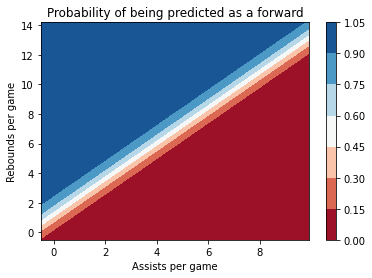

In [15]:
plot_contour_filled(APG, RPG)

## 觀察決策邊界圖

- 場均籃板與被預測為前鋒的機率有正向的相關性。
- 場均助攻與被預測為前鋒的機率有反向的相關性。
- 擔任中鋒與大前鋒的球員比較擅長爭搶籃板球、擔任後衛的球員比較擅長傳球助攻。

## 帶狀區間稱作決策邊界（Decision boundary）

- 決策邊界能夠隨著門檻（Threshold）設定往左上角或右下角移動，預設的門檻多半設定在 50%。
- 由 $h$ 預測出的 $\hat{p}$ 如果大於 50%，就輸出 $\hat{y} = 1$，否則輸出 $\hat{y} = 0$。

In [16]:
def plot_decision_boundary(XX, YY, x, y, target_vector, pos_dict, h, resolution=50):
    Y_hat = np.zeros((resolution, resolution))
    for i in range(resolution):
        for j in range(resolution):
            xx_ij = XX[i, j]
            yy_ij = YY[i, j]
            X_plot = np.array([xx_ij, yy_ij]).reshape(1, -1)
            z = h.predict(X_plot)
            Y_hat[i, j] = z
    fig, ax = plt.subplots()
    CS = ax.contourf(XX, YY, Y_hat, alpha=0.2, cmap='RdBu')
    colors = ['red', 'blue']
    unique_categories = np.unique(target_vector)
    for color, i in zip(colors, unique_categories):
        xi = x[target_vector == i]
        yi = y[target_vector == i]
        ax.scatter(xi, yi, c=color, edgecolor='k', label="{}".format(pos_dict[i]), alpha=0.6)
    ax.set_title("Decision boundary of Forwards vs. Guards")
    ax.set_xlabel("Assists per game")
    ax.set_ylabel("Rebounds per game")
    ax.legend()
    plt.show()

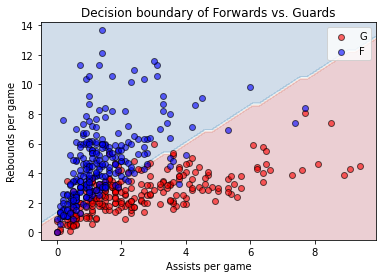

In [17]:
position_dictionary = {
    0: "G",
    1: "F"
}
plot_decision_boundary(APG, RPG, apg, rpg, y, position_dictionary, h)

## 觀察誤分類觀測值

- 藍色的資料點落在紅色的決策邊界（真實位置為前鋒、預測位置為後衛）。
- 紅色的資料點落在藍色的決策邊界（真實位置為後衛、預測位置為前鋒）。

## 如何決定 `X_train` 與 `y_train` 之間的關聯 $w$

- Scikit-Learn 預測器的關鍵：`fit()` 方法。
- 梯度遞減（Gradient descent）。

## 羅吉斯迴歸

## 承先啟後的橋樑

- 羅吉斯迴歸（Logistic Regression）分類器能夠協助我們由數值預測過渡至類別預測的任務。
- 欲得到類別預測 $\hat{y}$ 必須先得到類別預測機率 $\hat{p}$。

## Sigmoid 函數

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{p} = \sigma(Xw) = \frac{1}{1 + e^{-Xw}}
\end{equation}

In [18]:
def sigmoid(x):
    return(1 / (1 + np.exp(-x)))

In [19]:
def plot_sigmoid():
    x = np.linspace(-6, 6, 100)
    y = sigmoid(x)
    fig = plt.figure()
    ax = plt.axes()
    ax.plot(x, y)
    ax.axvline(0, color = 'black')
    ax.axhline(y = 0, ls = ':', color = 'k', alpha = 0.5)
    ax.axhline(y = 0.5, ls = ':', color = 'k', alpha = 0.5)
    ax.axhline(y = 1, ls = ':', color = 'k', alpha = 0.5)
    ax.set_yticks([0.0, 0.5, 1.0])
    ax.set_ylim(-0.1, 1.1)
    ax.set_title("Sigmoid function")
    plt.show()

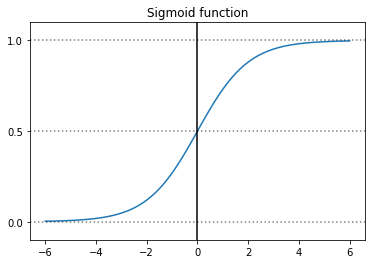

In [20]:
plot_sigmoid()

## 將迴歸模型的輸出 $Xw$ 映射至 $[0, 1]$ 之間就能獲得 $\hat{p}$

- 依據門檻值獲得 $\hat{y}$
- 此處門檻值以常見的 50% 表示。

\begin{equation}
\hat{y} = 1, \quad \text{if} \: \hat{p} \geq 0.5 \\
\hat{y} = 0, \quad \text{if} \: \hat{p} < 0.5
\end{equation}

## 資料與任務已經被定義妥善

- 特徵矩陣 $X$
- 目標向量 $y$
- 係數向量 $w$
- 任務：將 $X$ 輸入 $h$ 來預測 $\hat{y}$，$h$ 的組成可以拆解成 Sigmoid 函數 $\sigma$ 以及門檻值比較兩道程序。

## 將門檻值比較表示為階躍函式（Step function）

\begin{align}
\hat{y} &= h(X; w) \\
&= \chi(\sigma(Xw))
\end{align}

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\chi(z) = 1, \quad \text{if} \: z \geq 0.5 \\
\chi(z) = 0, \quad \text{if} \: z < 0.5
\end{equation}

## 定義評估

評估 $h$ 的方法是計算 $\hat{y}^{(train)}$ 與 $y^{(train)}$ 之間的誤分類數，誤分類數愈低，分類器的表現愈好。

\begin{equation}
\operatorname*{arg\,min}_w \sum_i \mid \hat{y}_i^{(train)} \neq y_i^{(train)} \mid
\end{equation}

## 使用交叉熵（Cross-entropy）作為損失函數 $J(w)$

為了書寫方便，我們省略訓練資料的註記$(train)$。

\begin{equation}
J(w) = -\frac{1}{m}log(\sigma(Xw)), \quad \text{if} \: y = 1 \\
J(w) = -\frac{1}{m}log(1-\sigma(Xw)), \quad \text{if} \: y = 0
\end{equation}

## 交叉熵巧妙之處：讓誤分類的損失趨近無限大

- 當真實的類別 $y$ 為 1，$\sigma(Xw)$ 若離 0 比較近，預測為類別 0 的機率較高。
- 當真實的類別 $y$ 為 0，$\sigma(Xw)$ 若離 1 比較近，預測為類別 1 的機率較高。

In [21]:
def plot_cross_entropy():
    epsilon = 1e-5
    h = np.linspace(epsilon, 1-epsilon) # 利用微小值 epsilon 避免 log(0) 的錯誤
    y1 = -np.log(h)
    y2 = -np.log(1 - h)
    fig, ax = plt.subplots(1, 2, figsize = (8, 4))
    ax[0].plot(h, y1)
    ax[0].set_title("$y=1$\n$-\log(\sigma(Xw))$")
    ax[0].set_xticks([0, 1])
    ax[0].set_xticklabels([0, 1])
    ax[0].set_xlabel("$\sigma(Xw)$")
    ax[1].plot(h, y2)
    ax[1].set_title("$y=0$\n$-\log(1-\sigma(Xw))$")
    ax[1].set_xticks([0, 1])
    ax[1].set_xticklabels([0, 1])
    ax[1].set_xlabel("$\sigma(Xw)$")
    plt.tight_layout()
    plt.show()

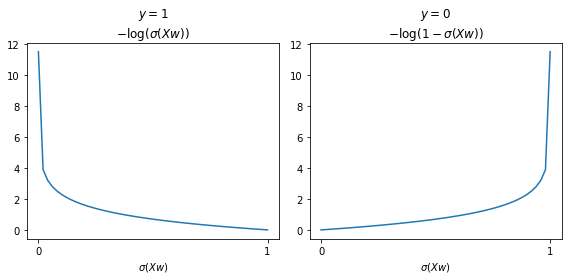

In [22]:
plot_cross_entropy()

## 將 $y$ 與 $1-y$ 加入 $J(w)$ 把兩個情境（$y=0$ 或 $y=1$）合而為一

當 $y=1$ 時，$J(w)$ 只剩下前項；當 $y=0$ 時，$J(w)$ 只剩下後項。

\begin{equation}
J(w) = \frac{1}{m}(-ylog(\sigma(Xw)) - (1-y)log(1-\sigma(Xw)))
\end{equation}

## 運用梯度遞減找到係數向量 $w^*$

\begin{equation}
w := w - \alpha \frac{\partial J}{\partial w}
\end{equation}

## 求解 $J(w)$ 關於 $w$ 的偏微分得具備三個先修知識

1. 連鎖法則（Chain rule）。
2. $e^{x}$ 關於 $x$ 的微分。
3. $log(x)$ 關於 $x$ 的微分。

## $J(w)$ 是一個由多個不同函數複合而成的損失函數

- 先是 Sigmoid 函數 $\sigma$
- 再來是 $log$ 函數。
- 欲求解複合函式偏微分得仰賴連鎖法則。

\begin{align}
(f\circ g)(x) &= f(g(x)) \\
(f\circ g)'(x) &= f'(g(x))g'(x)
\end{align}

## $e^{x}$ 關於 $x$ 的微分

\begin{equation}
\frac{d}{dx}e^{x} = e^{x}
\end{equation}

## $log(x)$ 關於 $x$ 的微分

\begin{equation}
\frac{d}{dx}log(x) = \frac{1}{x}
\end{equation}

## 推導 $J(w)$ 關於 $w$ 的偏微分

\begin{align}
\frac{\partial}{\partial w}J &= \frac{\partial}{\partial w} (-ylog(\sigma(Xw)) - (1-y)log(1-\sigma(Xw))) \\
&= -y\frac{\partial}{\partial w}log(\sigma(Xw)) - (1-y)\frac{\partial}{\partial w}(log(1-\sigma(Xw)))
\end{align}

## 首先計算 $log(\sigma(Xw))$ 關於 $w$ 的微分

\begin{align}
\frac{\partial}{\partial w}log(\sigma(Xw)) &= \frac{\partial}{\partial w}log(\sigma(Xw)) \cdot \frac{\partial}{\partial w}(\sigma(Xw)) \\
&= \frac{1}{\sigma(Xw)} \cdot \sigma'(Xw) \cdot \frac{\partial}{\partial w}Xw \\
&= \frac{1}{\sigma(Xw)} \cdot \sigma'(Xw) \cdot X
\end{align}

## 再計算 $log(1-\sigma(Xw))$ 關於 $w$ 的微分

\begin{align}
\frac{\partial}{\partial w}log(1-\sigma(Xw)) &= \frac{\partial}{\partial w}log(1-\sigma(Xw)) \cdot \frac{\partial}{\partial w}(1-\sigma(Xw)) \\
&=\frac{1}{1-\sigma(Xw)} \cdot (-\sigma'(Xw) \cdot \frac{\partial}{\partial w}Xw) \\
&=\frac{1}{1-\sigma(Xw)} \cdot (-\sigma'(Xw) \cdot X)
\end{align}

## 兩個部分都得先計算 $\sigma'(Xw)$ 也就是 Sigmoid 函數關於 $w$ 的微分，才能繼續推導

\begin{align}
\sigma'(Xw) &= \frac{\partial}{\partial w} \frac{1}{1 + e^{-Xw}} = \frac{\partial}{\partial w} (1 + e^{-Xw})^{-1} \\
&= \frac{-\frac{\partial}{\partial w}(1 + e^{-Xw})}{(1 + e^{-Xw})^2}
\end{align}

## 分子部分我們先推導 $e^{-x}$ 關於 $x$ 的微分

\begin{equation}
\frac{d}{dx}e^{-x} = \frac{d}{dx}\frac{1}{e^x} = \frac{-\frac{d}{dx} e^x}{(e^x)^2} = \frac{-e^x}{(e^x)^2} = \frac{-1}{e^x} = -e^{-x}
\end{equation}

## 於是 $\sigma'(Xw)$ 可以寫成

\begin{align}
\sigma'(Xw) &= \frac{-\frac{\partial}{\partial w}e^{-Xw}}{(1 + e^{-Xw})^2} = \frac{e^{-Xw}}{(1 + e^{-Xw})^2} \\
&= \frac{e^{-Xw}}{(1 + e^{-Xw}) \cdot (1 + e^{-Xw})}
\end{align}

## 這裡的推導有些狡猾，需要在分子設計一個 `+1-1`

\begin{align}
\sigma'(Xw) &= \frac{e^{-Xw}}{(1 + e^{-Xw}) \cdot (1 + e^{-Xw})} \\
&= \frac{1}{1 + e^{-Xw}} \cdot \frac{e^{-Xw} + 1 - 1}{1 + e^{-Xw}} = \frac{1}{1 + e^{-Xw}} \cdot ( \frac{1 + e^{-Xw}}{1 + e^{-Xw}} - \frac{1}{1 + e^{-Xw}}) \\
&=\frac{1}{1 + e^{-Xw}} \cdot ( 1 - \frac{1}{1 + e^{-Xw}}) \\
&=\sigma(Xw)(1-\sigma(Xw))
\end{align}

## 推導出 $\sigma'(Xw)$，再回去計算未完的兩個部分

\begin{align}
\frac{\partial}{\partial w}log(\sigma(Xw)) &= \frac{1}{\sigma(Xw)} \cdot \sigma'(Xw) \cdot X \\
&= \frac{1}{\sigma(Xw)}\sigma(Xw)(1-\sigma(Xw))X \\
&= (1-\sigma(Xw))X
\end{align}

\begin{align}
\frac{\partial}{\partial w}log(1-\sigma(Xw)) &= \frac{1}{1-\sigma(Xw)} \cdot (-\sigma'(Xw)) \cdot X\\
&=\frac{1}{1-\sigma(Xw)}(-(\sigma(Xw)(1-\sigma(Xw)))X) \\
&=-\sigma(Xw)X
\end{align}

## 最後回到 $J(w)$ 關於 $w$ 的偏微分

\begin{align}
\frac{\partial J}{\partial w} &= \frac{1}{m}(-y(1-\sigma(Xw))X - (1-y)(-\sigma(Xw)X)) \\
&=\frac{1}{m}(-X^Ty + y\sigma(Xw)X + X^T\sigma(Xw) - y\sigma(Xw)X) \\
&=\frac{1}{m}(-X^Ty + X^T\sigma(Xw)) \\
&=\frac{1}{m}(X^T(\sigma(Xw) - y))
\end{align}

## 梯度推導完畢

在迭代過程中 $w$ 更新的方向性取決於梯度正負號，如果梯度為正，$w$ 會向左更新（減小）；如果梯度為負，$w$ 會向右更新（增大）。

\begin{equation}
w := w - \alpha \frac{1}{m}(X^T(\sigma(X^{(train)}w) - y^{(train)})) \\
w := w - \alpha \frac{1}{m}(X^T(\sigma(\hat{y}^{(train)}) - y^{(train)}))
\end{equation}

## 自訂羅吉斯迴歸類別 LogitReg

```python
class LogitReg:
    """
    This class defines the vanilla descent algorithm for logistic regression.
    Args:
        fit_intercept (bool): Whether to add intercept for this model.
    """
    def __init__(self, fit_intercept=True):
        self._fit_intercept = fit_intercept
```

```python
    def sigmoid(self, X):
        """
        This function returns the Sigmoid output as a probability given certain model weights.
        """
        X_w = np.dot(X, self._w)
        p_hat = 1 / (1 + np.exp(-X_w))
        return p_hat
    def find_gradient(self):
        """
        This function returns the gradient given certain model weights.
        """
        m = self._m
        p_hat = self.sigmoid(self._X_train)
        X_train_T = np.transpose(self._X_train)
        gradient = (1/m) * np.dot(X_train_T, p_hat - self._y_train)
        return gradient
```

```python
    def cross_entropy(self, epsilon=1e-06):
        """
        This function returns the cross entropy given certain model weights.
        """
        m = self._m
        p_hat = self.sigmoid(self._X_train)
        cost_y1 = -np.dot(self._y_train, np.log(p_hat + epsilon))
        cost_y0 = -np.dot(1 - self._y_train, np.log(1 - p_hat + epsilon))
        cross_entropy = (cost_y1 + cost_y0) / m
        return cross_entropy
```

```python
    def fit(self, X_train, y_train, epochs=10000, learning_rate=0.001):
        """
        This function uses vanilla gradient descent to solve for weights of this model.
        Args:
            X_train (ndarray): 2d-array for feature matrix of training data.
            y_train (ndarray): 1d-array for target vector of training data.
            epochs (int): The number of iterations to update the model weights.
            learning_rate (float): The learning rate of gradient descent.
        """
        self._X_train = X_train.copy()
        self._y_train = y_train.copy()
        m = self._X_train.shape[0]
        self._m = m
        if self._fit_intercept:
            X0 = np.ones((self._m, 1), dtype=float)
            self._X_train = np.concatenate([X0, self._X_train], axis=1)
        n = self._X_train.shape[1]
        self._w = np.random.rand(n)
        n_prints = 10
        print_iter = epochs // n_prints
        for i in range(epochs):
            cross_entropy = self.cross_entropy()
            gradient = self.find_gradient()
            if i % print_iter == 0:
                print("epoch: {:6} - loss: {:.6f}".format(i, cross_entropy))
            self._w -= learning_rate*gradient
        w_ravel = self._w.ravel().copy()
        self.intercept_ = w_ravel[0]
        self.coef_ = w_ravel[1:].reshape(1, -1)
```

```python
    def predict_proba(self, X_test):
        """
        This function returns predicted probability with weights of this model.
        Args:
            X_test (ndarray): 2d-array for feature matrix of test data.
        """
        m = X_test.shape[0]
        if self._fit_intercept:
            X0 = np.ones((m, 1), dtype=float)
            self._X_test = np.concatenate([X0, X_test], axis=1)
        p_hat_1 = self.sigmoid(self._X_test).reshape(-1, 1)
        p_hat_0 = 1 - p_hat_1
        proba = np.concatenate([p_hat_0, p_hat_1], axis=1)
        return proba
    def predict(self, X_test):
        """
        This function returns predicted label with weights of this model.
        Args:
            X_test (ndarray): 2d-array for feature matrix of test data.
        """
        proba = self.predict_proba(X_test)
        y_pred = np.argmax(proba, axis=1)
        return y_pred
```

In [23]:
h = LogitReg()
h.fit(X_train, y_train, 100000, 0.01)

epoch:      0 - loss: 2.609462
epoch:  10000 - loss: 0.313341
epoch:  20000 - loss: 0.311938
epoch:  30000 - loss: 0.311872
epoch:  40000 - loss: 0.311868
epoch:  50000 - loss: 0.311868
epoch:  60000 - loss: 0.311868
epoch:  70000 - loss: 0.311868
epoch:  80000 - loss: 0.311868
epoch:  90000 - loss: 0.311868


In [24]:
## 預測機率
p_hat = h.predict_proba(X_valid)
p_hat[:5]

array([[0.27467951, 0.72532049],
       [0.11663093, 0.88336907],
       [0.97835931, 0.02164069],
       [0.11590761, 0.88409239],
       [0.13838955, 0.86161045]])

In [25]:
## 預測類別
y_hat = h.predict(X_valid)
y_hat_label = [position_dictionary[y] for y in y_hat]
print(y_hat[:5])
print(y_hat_label[:5])

[1 1 0 1 1]
['F', 'F', 'G', 'F', 'F']


## 二元分類延伸至多元分類

## 原始資料中球員的鋒衛位置不只分作前鋒（Forward, F）與後衛（Guard, G）亦有中鋒（Center, C），以及能夠勝任兩個位置的搖擺人（F-G、G-F）等

In [26]:
pos = player_stats['pos'].values
print(np.unique(pos))
print(np.unique(pos).size)

['C' 'C-F' 'F' 'F-C' 'F-G' 'G' 'G-F']
7


## One versus rest(all)

訓練 7 個羅吉斯迴歸分類器，每個鋒衛位置一個，輸出預測機率，再以 `np.argmax()` 函數決定預測類別。

\begin{align}
\hat{p}_{C} = \hat{p}(y=0|X; w) = 1 - \hat{p}(y \neq 0|X; w) \\
\hat{p}_{C-F} = \hat{p}(y=1|X; w) = 1 - \hat{p}(y \neq 1|X; w)  \\
\hat{p}_{F} = \hat{p}(y=2|X; w) = 1 - \hat{p}(y \neq 2|X; w)  \\
\hat{p}_{F-C} = \hat{p}(y=3|X; w) = 1 - \hat{p}(y \neq 3|X; w)  \\
\hat{p}_{F-G} = \hat{p}(y=4|X; w) = 1 - \hat{p}(y \neq 4|X; w)  \\
\hat{p}_{G} = \hat{p}(y=5|X; w) = 1 - \hat{p}(y \neq 5|X; w)  \\
\hat{p}_{G-F} = \hat{p}(y=6|X; w) = 1 - \hat{p}(y \neq 6|X; w)  \\
\hat{p} = \operatorname*{arg\,max}_\hat{p} (\hat{p}_{C}, \hat{p}_{C-F}, \hat{p}_{F}, \hat{p}_{F-C}, \hat{p}_{F-G}, \hat{p}_{G}, \hat{p}_{G-F})
\end{align}

In [27]:
unique_pos = player_stats['pos'].unique()
position_dictionary = {i: p for i, p in enumerate(unique_pos)}
position_dictionary_reversed = {v: k for k, v in position_dictionary.items()}
pos_multiple = player_stats['pos'].map(position_dictionary_reversed)
print(position_dictionary)
print(position_dictionary_reversed)
print(np.unique(pos_multiple))

{0: 'F', 1: 'C', 2: 'C-F', 3: 'G', 4: 'F-G', 5: 'G-F', 6: 'F-C'}
{'F': 0, 'C': 1, 'C-F': 2, 'G': 3, 'F-G': 4, 'G-F': 5, 'F-C': 6}
[0 1 2 3 4 5 6]


## 使用 Scikit-Learn 的 `LogisticRegression` 類別

- 在初始化時加入參數 `multi_class='ovr'` 就能面對多元分類問題。
- `predict_proba()` 方法輸出的陣列外觀為 `(m, n)`
- 第 0 欄是預測為類別 0（C）的機率 $\hat{p}(y=0|X; w)$、第 6 欄是預測為類別 6（G-F）的機率 $\hat{p}(y=6|X; w)$

In [28]:
X = player_stats[['apg', 'rpg']].values
y = pos_multiple
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
h = LogisticRegression(C=1e6, multi_class='ovr')
h.fit(X_train, y_train)
p_hat = h.predict_proba(X_valid)
p_hat[:5]

array([[0.40490237, 0.05139398, 0.03792722, 0.17546325, 0.07148895,
        0.15986192, 0.09896231],
       [0.45200637, 0.04492365, 0.03064291, 0.0732397 , 0.15789498,
        0.14802604, 0.09326636],
       [0.09274404, 0.00171049, 0.00230149, 0.74709532, 0.04019746,
        0.10681607, 0.00913514],
       [0.45609092, 0.06556372, 0.04355099, 0.07432653, 0.09877039,
        0.14627007, 0.11542738],
       [0.44521517, 0.07057772, 0.04748706, 0.08869962, 0.07985894,
        0.14832071, 0.11984079]])

## 應用 `np.argmax()` 函數回傳最大的欄位數，就能夠得到 $\hat{y}$

In [29]:
y_hat = np.argmax(p_hat, axis=1)
y_hat[:5]

array([0, 0, 3, 0, 0])

## 將整數對應回鋒衛位置的文字外觀

In [30]:
y_hat_label = [position_dictionary[i] for i in y_hat]
y_hat_label[:5]

['F', 'F', 'G', 'F', 'F']

## 兩種表示類別向量的形式

## 標籤編碼（Label encoder）

將類別變數的獨一值用 0 到 `n_classes - 1` 的整數表示，可以使用 Scikit-Learn 中的 `LabelEncoder` 轉換。

In [31]:
le = LabelEncoder()
pos = player_stats['pos'].values
pos_le = le.fit_transform(pos)
print(pos[:10])
print(pos_le[:10])

['F' 'C' 'C-F' 'G' 'G' 'G' 'C' 'F' 'F-G' 'F']
[2 0 1 5 5 5 0 2 4 2]


## 獨熱編碼（One-hot encoder）

將類別變數的獨一值用 `(m, n_classes)` 的稀疏矩陣表示，用 `1` 標註是該類，其餘欄位則用 `0` 標註不是該類，可以使用 Scikit-Learn 中的 `OneHotEncoder` 轉換。

In [32]:
ohe = OneHotEncoder()
pos_ohe = ohe.fit_transform(pos.reshape(-1, 1)).toarray()
print(pos[:10])
print(pos_ohe[:10])

['F' 'C' 'C-F' 'G' 'G' 'G' 'C' 'F' 'F-G' 'F']
[[0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]


## 標籤編碼與獨熱編碼

- 標籤編碼適合應用於具有量值層級意義、有排列順序的類別變數（例如冷熱可以對應溫度、快慢可以對應速度）與二元分類的情境。
- 獨熱編碼適合應用於一般無排列順序的類別變數以及多元分類的情境。